In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import Fastai modules needed for text

In [0]:
from fastai.text import *
from fastai import *

In [0]:
torch.__version__

'1.5.0+cu101'

In [0]:
print(__version__)

1.0.61


Load the twitter Data

In [0]:
df = pd.read_csv("drive/My Drive/bank-sentiment/bank_data.csv")
df.head()

,tweet,sentiment,date,weekday,hour,followers,description
0,because they answered you doesnt mean they are...,0,2019-03-06 05:15:05,2.0,5.0,521.0,arab academy alumni member of the nautical in...
1,because they answered you doesnt mean they are...,0,2019-03-06 05:15:05,2.0,5.0,521.0,arab academy alumni member of the nautical in...
2,there you have it,0,2019-03-06 05:03:39,2.0,5.0,708.0,without christs mercy my life is messychartere...
3,ok i understand and i also have some questions...,0,2019-03-06 05:01:35,2.0,5.0,1949.0,am a blogger pr and also a music producer
4,i have not been able to use my first bank appl...,1,2019-03-06 04:34:43,2.0,4.0,14.0,principal consultant green consulting


In [0]:
df.head(10)

,tweet,sentiment,date,weekday,hour,followers,description
0,because they answered you doesnt mean they are...,0,2019-03-06 05:15:05,2.0,5.0,521.0,arab academy alumni member of the nautical in...
1,because they answered you doesnt mean they are...,0,2019-03-06 05:15:05,2.0,5.0,521.0,arab academy alumni member of the nautical in...
2,there you have it,0,2019-03-06 05:03:39,2.0,5.0,708.0,without christs mercy my life is messychartere...
3,ok i understand and i also have some questions...,0,2019-03-06 05:01:35,2.0,5.0,1949.0,am a blogger pr and also a music producer
4,i have not been able to use my first bank appl...,1,2019-03-06 04:34:43,2.0,4.0,14.0,principal consultant green consulting
5,i recharged a number i was debited but the tra...,1,2019-03-06 04:26:56,2.0,4.0,80.0,avid reader food lover libra selective intr...
6,thanks ive confirmed it,0,2019-03-06 03:52:49,2.0,3.0,45.0,in world of so many im untamed one
7,pls is it possible to reactivate my dormant ac...,0,2019-03-06 02:27:36,2.0,2.0,75.0,a september born
8,i was charged for over 8 times for nip fees fo...,1,2019-03-06 02:21:59,2.0,2.0,154.0,certified physicist computer programmer mange...
9,i have already gotten an email by you guys wit...,0,2019-03-06 01:26:10,2.0,1.0,13.0,cool dude


In [0]:
df["tweet"][0], df["tweet"][4], df["tweet"][5]

('because they answered you doesnt mean they are prompt when answering others stop the hype and',
 'i have not been able to use my first bank application the response  i got is network error which is not',
 'i recharged a number i was debited but the transaction was not a successful one can i be refunded as soon as possible')

Handle Missing Values

In [0]:
df_1 = df.loc[:,["tweet","sentiment"]]

In [0]:
index = df_1.isna()[df_1[["tweet"]].isna()["tweet"] == True].index

In [0]:
len(index), len(df_1)

(44, 7534)

Drop the index

In [0]:
df_1.drop(index,inplace=True)

In [0]:
df_1.isna().sum()

tweet        0
sentiment    0
dtype: int64

Assing inetgers value to the labels

In [0]:
mm = {
    1:"neg",
    0:"pos"
}

df_1["label"] = df_1["sentiment"].map(mm)

In [0]:
df_1[["label"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7490 entries, 0 to 7533
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   7490 non-null   object
dtypes: object(1)
memory usage: 117.0+ KB


In [0]:
len(df_1)

7490

In [0]:
df_1.describe()

,sentiment
count,7490.000000
mean,0.475834
std,0.499449
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [0]:
df_1.head()

,tweet,sentiment,label
0,because they answered you doesnt mean they are...,0,pos
1,because they answered you doesnt mean they are...,0,pos
2,there you have it,0,pos
3,ok i understand and i also have some questions...,0,pos
4,i have not been able to use my first bank appl...,1,neg


In [0]:
df_1.drop("sentiment",axis=1, inplace=True)

## Lnaguage model
We train a language model by fine tuning a language model trained on wikiText

In [0]:
path = "drive/My Drive/bb"

In [0]:
bs=30

Build the datapipline for the language model. It does the required processing for the text data. and also split the data into train and validation set for training the language model

In [0]:
data_m = (TextList.from_df(df_1,path=path)
          .random_split_by_pct(0.1)
          .label_for_lm()
          .databunch(bs=bs)
         )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [0]:
data_m.save('tmp_lm')  # save the data formatted for future use

In [0]:
data_m.path # this the path in which the data is being stored

PosixPath('drive/My Drive/bb')

The data can then be easily imorted using `load_data`

In [0]:
data_m = load_data(path, 'tmp_lm', bs=bs) 

In [0]:
data_m.show_batch()

idx,text
0,recharged a number i was debited but the transaction was not a successful one can i be refunded as soon as possible xxbos thanks i ve confirmed it xxbos pls is it possible to reactivate my dormant acct online perhaps what s d way to xxbos i was charged for over 8 times for nip fees for a transfer that did nt go through xxbos i have already gotten an
1,to reactivate my online banking i was unable to login this morning please its urgent thanks xxbos i am waiting for a response please xxbos i dm a complaint two days ago and nothing has been done about it neither have i been informed of any xxunk xxbos please respond to my dm xxbos check your dm thanks xxbos have already dm transactions details to you since yesterday xxbos done
2,xxunk xxbos please respond to you xxunk if this is how your xxunk is i must say its poor you asked fo xxbos helloi am tired of this bank called first bank my account was credited with 5000 this morning xxunk xxbos i sent in a dm for over 48hrs now no response xxbos account name xxunk xxunk account number xxunk of xxunk and 400 was debited from m xxbos
3,their customer care line xxbos it is a birthday xxunk out you xxunk xxbos hello i noticed you re also one of many which this bank has failed in terms of cust xxbos y all better attend to her you guys know you re in one trouble with xxbos please i have been xxunk with my account which i created on the phone and deposited some amount of mo xxbos
4,xxbos to charge someone you guys will do it in seconds to refund now will be taking xxunk my money o xxbos i made a deposit to my bet9ja online account i was debited but the transaction status shows failed on their system xxbos i did t get reply to my tweet o xxbos pls attend to me have dm the transactions details to you since yesterday xxbos i want


Initialize the language model using AWD_LSTM to create the language model using pretrained model

In [0]:
learn = language_model_learner(data_m, arch=AWD_LSTM, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


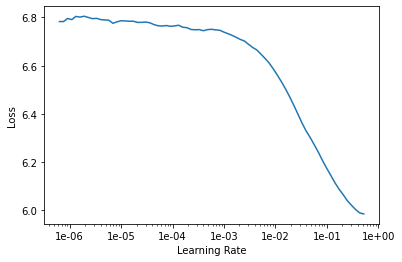

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(5, max_lr=slice(1e-3,1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.895908,4.333917,0.210238,00:04
1,4.578445,4.310377,0.221905,00:03
2,4.239822,4.143575,0.240714,00:04
3,3.803609,3.977875,0.256984,00:04
4,3.388171,3.962680,0.264286,00:04


We can decide to store the weight  or continue traininng.

In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


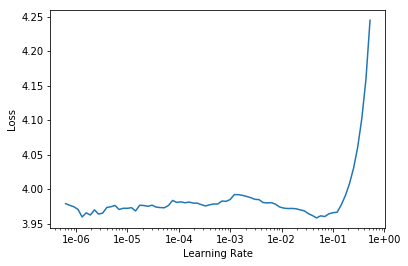

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


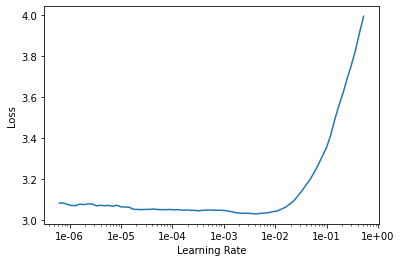

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(50, max_lr=slice(1e-5,1e-4), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.039176,3.966589,0.265714,00:05
1,3.048011,3.965369,0.264524,00:06
2,3.041411,3.965712,0.264921,00:06
3,3.039608,3.966459,0.265079,00:06
4,3.036275,3.968533,0.265952,00:05
5,3.029965,3.971128,0.265079,00:05
6,3.020184,3.968366,0.266667,00:05
7,3.014895,3.971887,0.267222,00:05
8,2.999061,3.971832,0.267381,00:05
9,2.991701,3.970086,0.268254,00:05


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "please check"
N_WORDS = 5
N_SENTENCES = 2

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

please check your dm xxbos nothing is
please check your dm xxbos good afternoon


In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
import math

In [0]:
df_1.head()

,tweet,label
0,because they answered you doesnt mean they are...,pos
1,because they answered you doesnt mean they are...,pos
2,there you have it,pos
3,ok i understand and i also have some questions...,pos
4,i have not been able to use my first bank appl...,neg


In [0]:
neg = df_1.query("label =='neg'")
pos = df_1.query("label =='pos'")

In [0]:
len(neg),len(pos)

(3564, 3926)

In [0]:
neg.head()

,tweet,label
4,i have not been able to use my first bank appl...,neg
5,i recharged a number i was debited but the tra...,neg
8,i was charged for over 8 times for nip fees fo...,neg
10,i was trying to recharge my airtel line via th...,neg
17,im surprised that as at today 04032019 my seco...,neg


In [0]:
test = pd.concat([neg[:150],pos[:150]],axis=0).sample(frac=1).reset_index()

In [0]:
train = pd.concat([neg[150:],pos[150:]],axis=0).sample(frac=1).reset_index()

In [0]:
train.head()

,tweet,label
0,call their customer care asap call them daily...,pos
1,isnt it odd that people dont realise the headl...,pos
2,this page does not ever deliver please fix i...,neg
3,good morning to you hope you had a great nigh...,pos
4,this is getting out of hand and am losing ma p...,neg


In [0]:
train.drop("index", axis=1,inplace=True)
test.drop("index", axis=1, inplace=True)

In [0]:
len(train),len(test)

(7190, 300)

In [0]:
7190 +300

7490

Data processing for the classifier

In [0]:
data_clas = (TextList.from_df(train,vocab=data_m.vocab,path=path)
             .random_split_by_pct(0.1)
             .label_from_df(cols="label")
             .databunch(bs=bs)
            )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [0]:
data_clas.save('data_clas.pkl')

In [0]:
data_clas.path

PosixPath('drive/My Drive/bb')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [0]:
data_clas.show_batch()

text,target
xxbos i tried to transfer some cash to a gtb account via the ussd code gtb did nt show up as an option of banks to make the transfer to,neg
xxbos i was debited via the ussd when i tried to recharge but did nt get the airtime and i am yet to get the reversal of the money,neg
xxbos i ve been on call with machine for more than xxunk h xxrep 4 a its not till free na u people should respond and pick call na,neg
xxbos i was told my money would be reversed after 7 working days on friday xxunk made it 7 working days i am yet to get my xxunk back,neg
xxbos the transaction was done twice 1 xxrep 4 0 each total of 2 xxrep 4 0 and 1 xxrep 4 0 has been reversed while the xxunk,neg


In [0]:
data_clas.classes

['neg', 'pos']

We create the classifier using the same AWD_LSTM model.

We pass in the pretrained weight of the language model trained using `load_encoder('fine_tuned_enc')`

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc');

In [0]:
learn.summary()

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [30, 400]            0          False     
______________________________________________________________________
RNNDropout           [30, 1152]           0          False     
______________________________________________________________________
RNNDropout           [30, 1152]           0          False     
______________________________________________________________________
BatchNorm1d          [1200]               2,400      True      
______________________________________________________________________
Dropout              [1200]               0          False     
______________________________________________________________________
Linear               [50]                 60,050     True      
______________________________________________________________________
ReLU                 [50]                 0          False     
________________________________________________

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


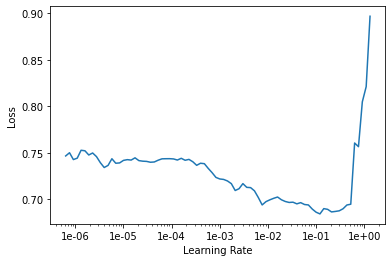

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.659306,0.461466,0.805285,00:08
1,0.647916,0.427818,0.805285,00:08
2,0.636797,0.395317,0.833102,00:07
3,0.552979,0.388659,0.837274,00:08
4,0.520571,0.419185,0.849791,00:08


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(4e-2/(2.6**4),4e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.553251,0.403659,0.840056,00:09
1,0.519703,0.372452,0.845619,00:09


In [0]:
learn.save('second')

In [0]:
learn.load('second');

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


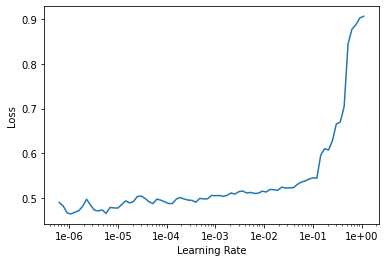

In [0]:
learn.freeze_to(-3)
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.456084,0.344059,0.855355,00:14
1,0.394596,0.328443,0.866481,00:14


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(4e-3/(2.6**4),4e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.400994,0.325787,0.859527,00:18


In [0]:
learn.save("final")

In [0]:
learn.export("final")

##  Test Prediction And Accuracy

In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score,recall_score

In [0]:
true_label = test["label"].to_list()

In [0]:
tweet = test["tweet"].to_list()

In [0]:
true_label[-1],pred[-1]

('pos', 'neg')

In [0]:
prediction = []
for text in tweet:

  pred = learn.predict(text)[1].item()

  if pred == 0:
    prediction.append("neg")
  else:
    prediction.append("pos")


In [0]:
prediction[-1]

'pos'

In [0]:
print(classification_report(prediction,true_label, target_names=['neg','pos']))
print("Confusion Matrix")
print(confusion_matrix(prediction,true_label))

              precision    recall  f1-score   support

         neg       0.87      0.77      0.82       170
         pos       0.74      0.85      0.79       130

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300

Confusion Matrix
[[131  39]
 [ 19 111]]
